# Лабораторная 11. Персептрон

In [ ]:
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# sklearn
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

df=pd.read_csv('ParisHousingClass.csv')
X=df.iloc[:,:17]
y=df.iloc[:,17]
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)
print(X_sm.shape)
print(X.shape)
df_new_sm=pd.concat([X_sm, y_sm], axis=1)
df_new_sm.shape
df = df_new_sm
df.head(10)

(17470, 17)
(10000, 17)


,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury
5,39223,36,0,1,17,39489,8,6,2012,0,1,2009,4552,757,0,1,3926647.2,Basic
6,58682,10,1,1,99,6450,10,9,1995,1,1,5930,9453,848,0,5,5876376.5,Luxury
7,86929,100,1,0,11,98155,3,4,2003,1,0,6326,4748,654,0,10,8696869.3,Basic
8,51522,3,0,0,61,9047,8,3,2012,1,1,632,5792,807,1,5,5154055.2,Basic
9,39686,42,0,0,15,71019,5,8,2021,1,1,5198,5342,591,1,3,3970892.1,Basic


In [ ]:
mapping = {"Luxury": 1, "Basic": 0}
df['category'] = df['category'].map(mapping)

from sklearn import preprocessing
X_train = df.iloc[:,:16]
X_normalized = preprocessing.normalize(X_train, norm='l2')
frame = pd.DataFrame(X_normalized, columns = ['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors', 'cityCode', 'cityPartRange', 'numPrevOwners', 'made',
                                              'isNewBuilt', 'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom', 'hasGuestRoom'])
frame['price'] = df['price']
frame['category'] = df['category']

df = frame
df.head(5)

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,0.983542,0.000039,0.000000,0.000013,0.000820,0.122065,0.000039,0.000104,0.026111,0.000000,0.000013,0.056169,0.117273,0.012450,0.000000,0.000091,7559081.5,0
1,0.897556,0.000433,0.000011,0.000011,0.001089,0.437616,0.000089,0.000067,0.022391,0.000011,0.000000,0.040593,0.027070,0.001422,0.000011,0.000022,8085989.5,1
2,0.841594,0.000876,0.000000,0.000015,0.000287,0.520513,0.000091,0.000121,0.030530,0.000000,0.000000,0.044367,0.133720,0.002039,0.000015,0.000136,5574642.1,0
3,0.745210,0.001084,0.000000,0.000000,0.000138,0.644276,0.000231,0.000092,0.046397,0.000000,0.000023,0.015197,0.164672,0.008279,0.000000,0.000069,3232561.2,0
4,0.874320,0.000236,0.000012,0.000012,0.001117,0.472298,0.000037,0.000087,0.024704,0.000012,0.000000,0.104714,0.030154,0.003625,0.000012,0.000050,7055052.0,1


Class 0: 8735
Class 1: 8735
Пропорция: 1.0 : 1


<ipython-input-12-a3d219217ad9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='category', data= df, palette="OrRd")


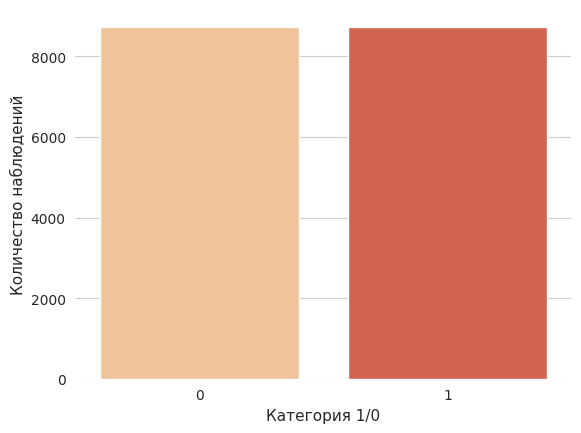

In [ ]:
target_count = df.category.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])

print('Пропорция:', round(target_count[0] / target_count[1], 2), ': 1')

sns.countplot(x='category', data= df, palette="OrRd")
plt.box(False)
plt.xlabel('Категория 1/0',fontsize=11)
plt.ylabel('Количество наблюдений',fontsize=11)
plt.show()

In [ ]:
X = df.iloc[:,:17]
y = df.iloc[:,17]

sc = StandardScaler()
X = sc.fit_transform(X)

X_cut = X[:, [0, 1, 3]]

Обучающих данных: (12229, 17)
Неверно классифицированные образцы: 2
Точность: 1.00


Text(0.5, 1.1, 'Матрица неточности Персептрон\n')

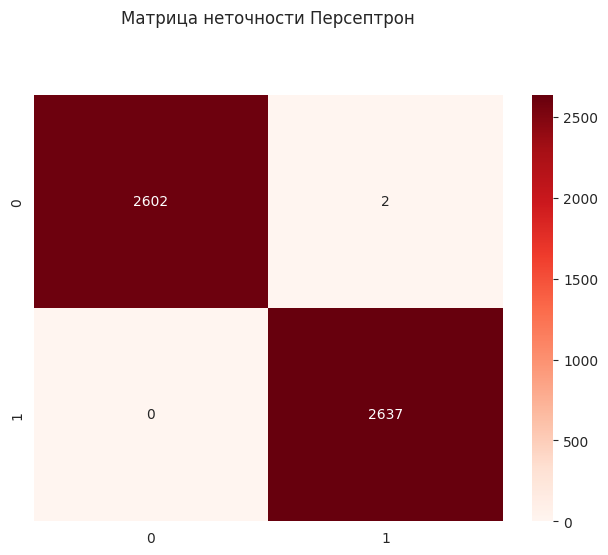

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

ppn = Perceptron(max_iter=10000, random_state=0)
ppn.fit(X_train,y_train)
y1 = ppn.predict(X_test)
print('Обучающих данных:', X_train.shape)
print('Неверно классифицированные образцы: %d' % (y_test != y1).sum())
print('Точность: %.2f' % accuracy_score(y_test, y1))

# матрица неточности

cnf_matrix_log = confusion_matrix(y_test, y1)
sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
plt.tight_layout()
plt.title('Матрица неточности Персептрон\n', y=1.1)

Обучающих данных: (12229, 17)
Неверно классифицированные образцы: 0
Точность: 1.00


Text(0.5, 1.1, 'Матрица неточности Персептрон\n')

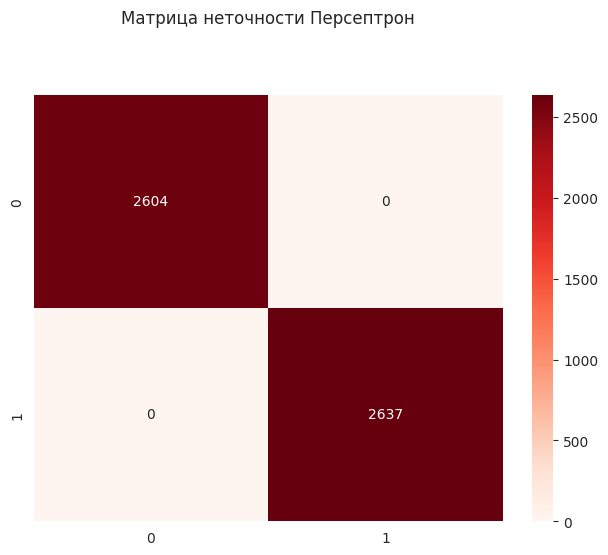

In [ ]:
mlp= MLPClassifier(activation='relu', solver='lbfgs', alpha=1e-5, max_iter=10000, hidden_layer_sizes=(5,), random_state=1)
mlp.fit(X_train,y_train)
mlp_pred = mlp.predict(X_test)
print('Обучающих данных:', X_train.shape)
print('Неверно классифицированные образцы: %d' % (y_test != mlp_pred).sum())
print('Точность: %.2f' % accuracy_score(y_test, mlp_pred))

# матрица неточности

cnf_matrix_log = confusion_matrix(y_test, mlp_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
plt.tight_layout()
plt.title('Матрица неточности Персептрон\n', y=1.1)

### ROC

In [ ]:
y_score = ppn.predict(X_test)
y_score

array([1, 1, 1, ..., 0, 0, 1])

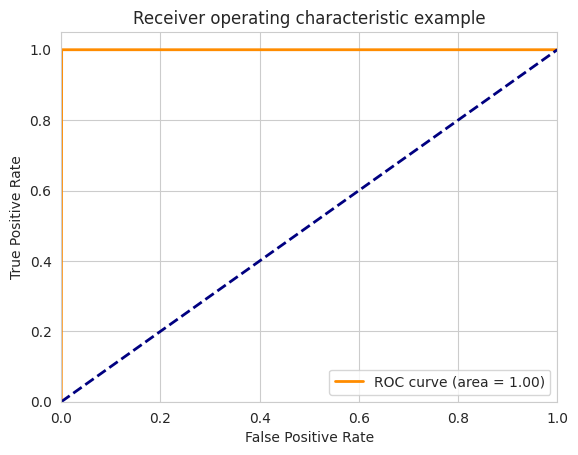

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
# ROC - анализ
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_test > 0, y_score  > 0)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Сокращенный набор

Обучающих данных: (12229, 3)
Неверно классифицированные образцы: 1157
Точность: 0.78


Text(0.5, 1.1, 'Матрица неточности Персептрон\n')

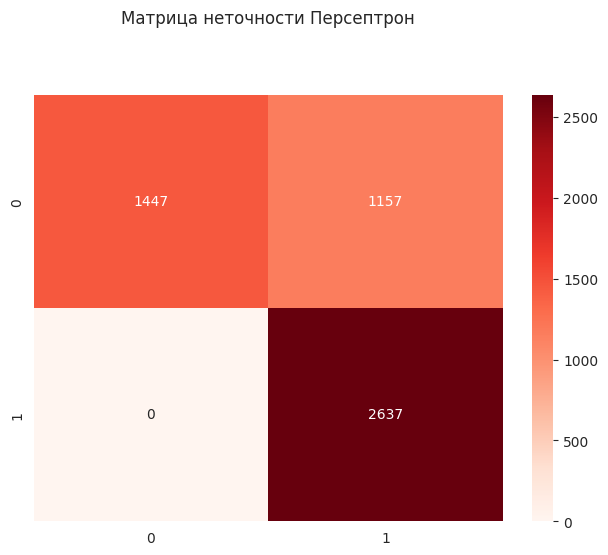

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_cut, y, test_size = 0.3, random_state = 0)

ppn = Perceptron(max_iter=10000, random_state=0)
ppn.fit(X_train,y_train)
y1 = ppn.predict(X_test)
print('Обучающих данных:', X_train.shape)
print('Неверно классифицированные образцы: %d' % (y_test != y1).sum())
print('Точность: %.2f' % accuracy_score(y_test, y1))

# матрица неточности

cnf_matrix_log = confusion_matrix(y_test, y1)
sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
plt.tight_layout()
plt.title('Матрица неточности Персептрон\n', y=1.1)

Обучающих данных: (12229, 3)
Неверно классифицированные образцы: 1144
Точность: 0.78


Text(0.5, 1.1, 'Матрица неточности Персептрон\n')

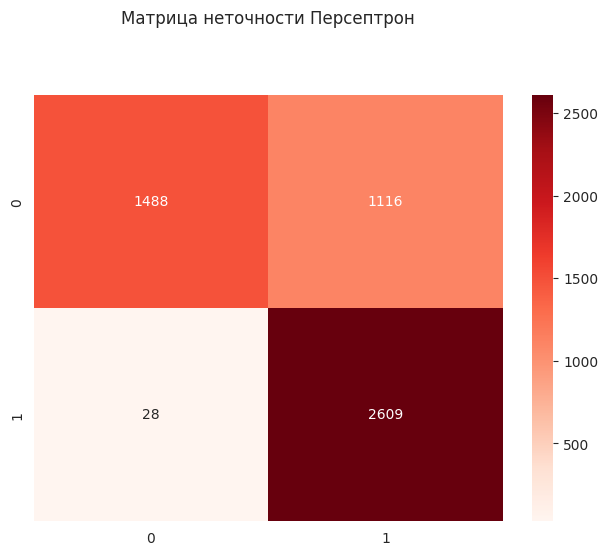

In [ ]:
mlp= MLPClassifier(activation='relu', solver='lbfgs', alpha=1e-5, max_iter=10000, hidden_layer_sizes=(5,), random_state=1)
mlp.fit(X_train,y_train)
mlp_pred = mlp.predict(X_test)
print('Обучающих данных:', X_train.shape)
print('Неверно классифицированные образцы: %d' % (y_test != mlp_pred).sum())
print('Точность: %.2f' % accuracy_score(y_test, mlp_pred))

# матрица неточности

cnf_matrix_log = confusion_matrix(y_test, mlp_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
plt.tight_layout()
plt.title('Матрица неточности Персептрон\n', y=1.1)

In [ ]:
y_score = mlp.predict(X_test)
y_score

array([1, 1, 1, ..., 0, 1, 1])

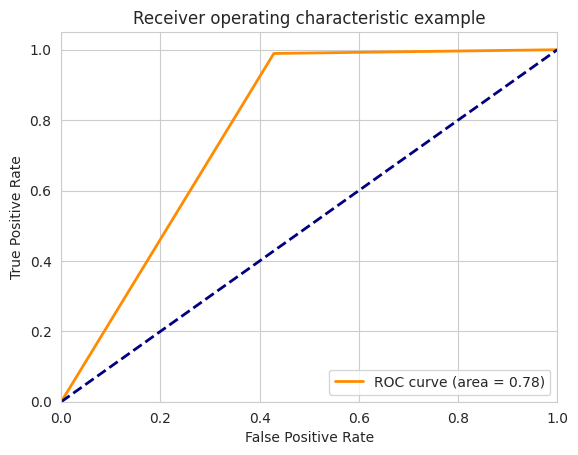

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
# ROC - анализ
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_test > 0, y_score  > 0)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
y_score = ppn.predict(X_test)
y_score

array([1, 1, 1, ..., 0, 1, 1])

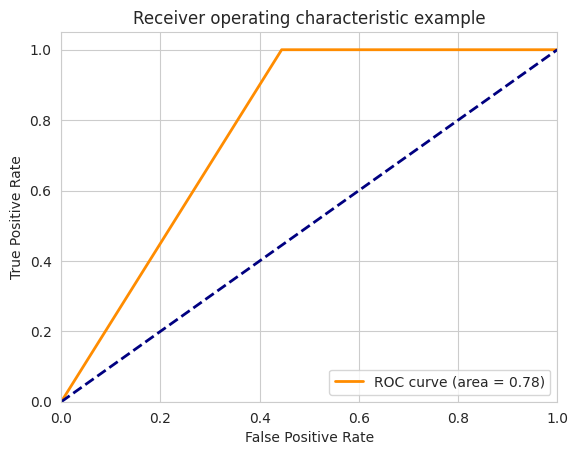

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
# ROC - анализ
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_test > 0, y_score  > 0)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()